# Lending Club Case Study - Sreekumar N.P.

Problem Statement :
Lending Club requires me to analyze all driving factors and dependencies of the Loan defaulters and provide them with recommendations to identify such applicants.

In [1]:
#import the libraries
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore") #This is to hide warnings related to sns as advised in the visualization module.
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step1 : Data Understanding

In [2]:
#read the dataset and check the first five rows to Check if the data in the data frame is consistent such that there 
#is no misplaced data between columns.

df1=pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
df1.shape


(39717, 111)

In [4]:
#Check the information related to the dataframe to see if the quantitative values are int/float 
#and categorical is object / String

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Check statistical information of the dataframe to see if there are any ouliers through intuitive analysis and also to see where are 
#the most frequent values exist through median and quantile analysis.

df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Inference from the data above : Seems the 25th,50th and 75th percentile of annual income is in the range of 10^4 where as the maximum is in the range of 10^6. This could mean there are outliers to the higher range. 

In [6]:
##Check the datatypes of all the columns of the dataframe
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
#Check the columns having null values and count of null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Check if there are columns which only contains Null values

In [8]:
#Find columns having null values
df1.isnull().all().sum()

54

In [9]:
#Find columns with all null values and display it with its data type before making a decision to drop them.
df1_null=df1.loc[:,df1.isnull().all()]
df1_null.dtypes

mths_since_last_major_derog       float64
annual_inc_joint                  float64
dti_joint                         float64
verification_status_joint         float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_il_6m                        float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    

# Step2 : Data Cleaning

In [10]:
#dropping columns with all null
df1=df1.dropna(axis=1,how='all')

In [11]:
#Check if the Coulmns with all null values are deleted.
df1.isnull().all().sum()


0

In [12]:
#Find rows having null values after dropping.
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

 # Inference from the data above : As more than ~90% of rows are null in mths_since_last_record ,next_pymnt_d, it is better to delete those columns.

In [13]:
#Delete Columns : mths_since_last_record ,mths_since_last_delinq 
df1 = df1.drop(columns = ['mths_since_last_record' ,'next_pymnt_d'])

In [14]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
#Check if there are null values in the loan_status column.
df1.loan_status.isnull().sum()


0

In [16]:
# Find data within the loan_status series and number of instances of the data within 'loan_status'
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Find the data type of columns
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [18]:
# interst rate needs to be converted to a quantitative value for easy analysis.
df1.int_rate=df1.int_rate.str.replace('%','')
df1.int_rate.value_counts()
df1.int_rate=df1.int_rate.astype("float")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
#Check and ensure that int_rate is changed to float64
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [20]:
#Check if there are null values in the dti column.
df1.dti.isnull().sum()

0

In [21]:
#Check if there are null values in the emp_length column.
df1.emp_length.isnull().sum()

1075

In [22]:
#delete the null value rows, as it doen't make sense to have blank values.
df1 = df1.dropna(subset=['emp_length'])
df1.emp_length.isnull().sum()

0

In [23]:
#check the count of each category in the variable
df1.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
#Check the remaining null values within the dataset
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      1440
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12495
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [25]:
#Check shape of the dataframe after data cleaning
df1.shape

(38642, 55)

# Find Outliers using box plot

In [26]:
df1.annual_inc.describe()

count    3.864200e+04
mean     6.960828e+04
std      6.425320e+04
min      4.000000e+03
25%      4.140000e+04
50%      6.000000e+04
75%      8.319999e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

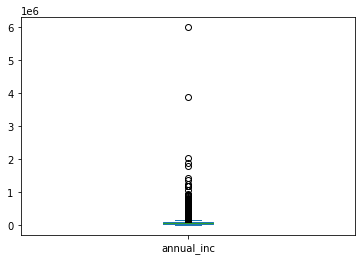

In [27]:
df1.annual_inc.plot.box()

# From further investigation to gain domain experience the important variables identified are: 
1. Annual Income (annual_inc)
2. Loan Amount (loan_anmt)
3. Term (term)
4. Grade (grade)
5. SubGrade (sub_grade)
6. Loan Amount (loan_amnt)
7. Purpose of loan (purpose)
8. DTI (dti)
9. Employment years (emp_length)
10. Hpme Ownership (home_ownership)
11. Verification_Status (verification_status)

There are customer behavioral variables present in the dataset, but that won't be available at the time of loan application hence can be ignored.


In [28]:
#As anaysis is on finding the factors that contribute for chargeoff, details related to 'Current' are irrelevant.
#So dropping them
df1 = df1.drop(df1[df1.loan_status == 'Current'].index)
df1.shape

(37544, 55)

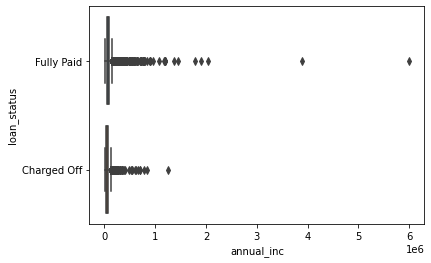

In [29]:
#Analyze the data relationship outliers between loan_status and annual income.
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [30]:
#Remove the outliers from annual income which are less than 1e6
df1 = df1[df1.annual_inc < 1000000]

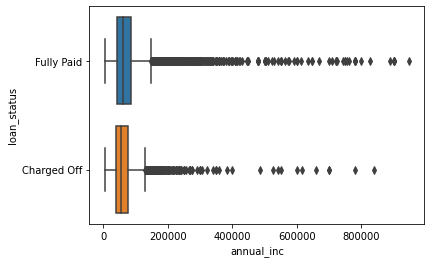

In [31]:
#Check plot after removal of outliers
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [32]:
#Create a df2 with annual income restricted to 1e6 and loan status == charged off for detecting outliers
df2 = df1[(df1.annual_inc <1000000) & (df1.loan_status == 'Charged Off')]
df2.head()
df2.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.398000e+03,5.398000e+03,5398.00000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,5398.000000,...,5398.000000,5398.000000,5398.000000,5392.0,5398.0,5398.0,5392.0,5398.0,5280.000000,5397.0
mean,6.955654e+05,8.646127e+05,12243.42349,11883.702297,10967.817088,13.882108,339.870923,63111.270791,13.978359,0.169878,...,685.000623,89.135075,329.154329,0.0,1.0,0.0,0.0,0.0,0.064205,0.0
std,2.173875e+05,2.741799e+05,8087.12192,7759.375996,7677.998799,3.639362,217.134322,45314.605300,6.570895,0.534041,...,1746.315653,392.288766,535.478993,0.0,0.0,0.0,0.0,0.0,0.246681,0.0
min,6.141900e+04,8.035300e+04,900.00000,900.000000,0.000000,5.420000,22.790000,4080.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.273445e+05,6.819455e+05,6000.00000,5850.000000,5000.000000,11.460000,171.480000,38232.332500,9.050000,0.000000,...,9.465000,0.000000,115.622500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.961850e+05,8.873260e+05,10000.00000,10000.000000,9575.000000,13.610000,297.530000,54000.000000,14.290000,0.000000,...,180.500000,2.570000,241.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.535468e+05,1.065093e+06,17000.00000,16000.000000,15000.000000,16.450000,463.275000,75000.000000,19.237500,0.000000,...,607.960000,9.561575,411.410000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.00000,35000.000000,35000.000000,24.400000,1305.190000,840000.000000,29.850000,8.000000,...,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Inference from the data above : The charged Off maximum annual income is 840000. We can remove the outliers of annual income above it.

In [33]:
#Remove outliers above 840000 so that the focus will be on the representative information
df1 = df1[df1.annual_inc <= 840000] 

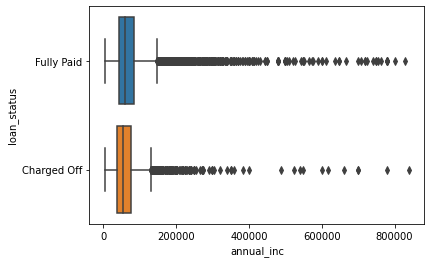

In [34]:
#Visualize data between loan_status and annual_inc after removal of outliers
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

# Step3 :  Data Analysis

## Univariate Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

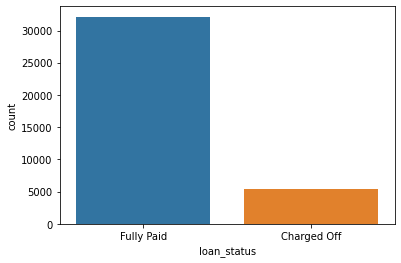

In [35]:
#Loan Status count categorical univariate analysis
sns.countplot(x="loan_status", data = df1)

### Inference from the analysis above : The number of fully paid loans is much higher than charged Off

<AxesSubplot:>

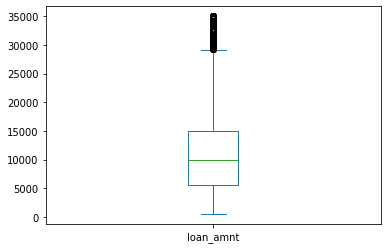

In [36]:
#Loan amount quantitative univariate analysis
df1.loan_amnt.plot.box()

In [37]:
df1.loan_amnt.describe()

count    37524.000000
mean     11118.582107
std       7353.387051
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### Inference from the analysis above : Loan amount has wide range of values max being 35000 , min being 500 and 75th percentile lies at 15000.

In [38]:
#Univariate analysis for 'grade' 
df1.grade.describe()

count     37524
unique        7
top           B
freq      11355
Name: grade, dtype: object

<AxesSubplot:xlabel='grade', ylabel='count'>

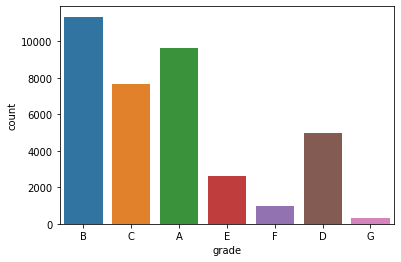

In [39]:
sns.countplot(x="grade",data= df1)

### Inference from the analysis above : People in high risk group finds difficult to get loans.

<AxesSubplot:xlabel='term', ylabel='count'>

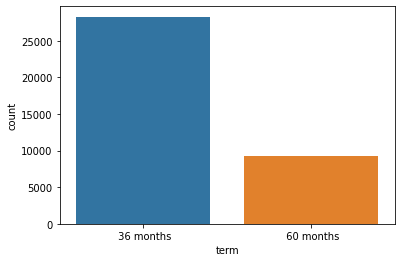

In [40]:
#Univariate analysis for 'term'
sns.countplot(x='term',data=df1)

### Inference from the above analysis : Short terms loans are more compare to long term.

<AxesSubplot:xlabel='count', ylabel='emp_length'>

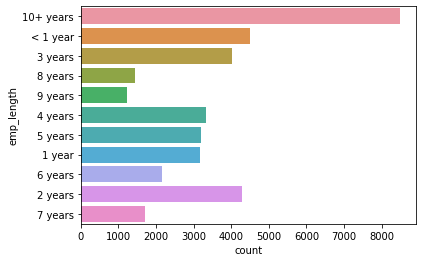

In [41]:
#univariate amalysis of emp_length
sns.countplot(y='emp_length', data=df1)

### Inference from the analysis above : People with 10+ years experience has taken more loans.

## Segmented Univariate Analysis

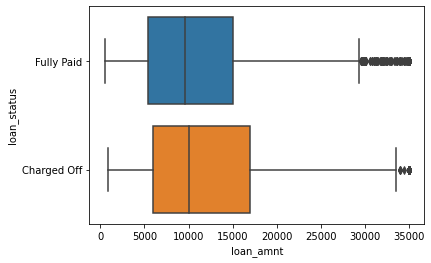

In [42]:
#Segmented Univariate : Analysis of the data between difference segments of the same variable
sns.boxplot(df1.loan_amnt,df1.loan_status)
plt.show()

### Inference from the data above : The median of the loan amount charged off is almost equal to the median of the Fully paid. Moreover, the upper quartile indicates that charged off happens on higher loan amounts.

<AxesSubplot:xlabel='loan_status'>

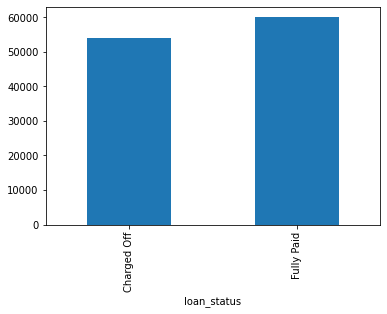

In [43]:
# Segmented Univariate : Loan status segments analyzed against Annual income using median value bar plot
df1.groupby(['loan_status'])['annual_inc'].median().plot.bar()

### Inference from the data above : There is not much to infer from the median bar plots, hence it would require the process of binning and further analysis

In [44]:
#Create a new variable Income range 'incomeRange' using the binning process.
# The qcut method is used to bin the annual income distributed over wide range into alomost equally sized bins.
df1['incomeRange']=pd.qcut(df1.annual_inc,[0,0.33,0.66,1],["L","M","H"])

In [45]:
df1.incomeRange.value_counts()

H    12668
L    12482
M    12374
Name: incomeRange, dtype: int64

<AxesSubplot:xlabel='incomeRange'>

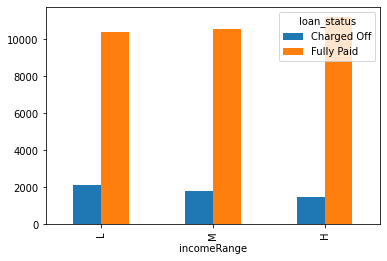

In [46]:
# Segmented Univariate : Segments of Annual Income is analyzed against the Loan status 
dfIncLoanstatus=df1[['incomeRange','loan_status']]
resIncLoanstatus=pd.pivot_table(data=dfIncLoanstatus,index=['incomeRange'],columns =['loan_status'],aggfunc=len)
resIncLoanstatus.head()
resIncLoanstatus.plot(kind="bar")

### Inference from the above analysis : When the income range increases the charged Off cases decreases.

## Bivariate Analysis :

# Analyzing Loan amount against Income range and Loan Status

In [47]:
#Draw a pivot table using Loan status, Income range and the loan amount and assign the result to 'res'
res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=sum,margins = True,fill_value = 0)
res.head()

incomeRange,L,M,H,All
loan_status,,,,
Charged Off,17452350,22976975,25660675,66090000
Fully Paid,77287325,112186475,161649875,351123675
All,94739675,135163450,187310550,417213675


In [48]:
# Calculate percentage of Loan status among different income ranges and assign the result to a pivot table resPer
resPer = (res.div(res.iloc[:,-1],axis=0)*100)
resPer.head()

incomeRange,L,M,H,All
loan_status,,,,
Charged Off,26.406945,34.766190,38.826865,100.0
Fully Paid,22.011425,31.950701,46.037874,100.0
All,22.707711,32.396697,44.895592,100.0


In [49]:
##Apply customisations
resPlt = resPer.drop(index='All',axis=0)
resPlt = resPlt.drop(columns='All',axis=1)

<AxesSubplot:xlabel='incomeRange', ylabel='loan_status'>

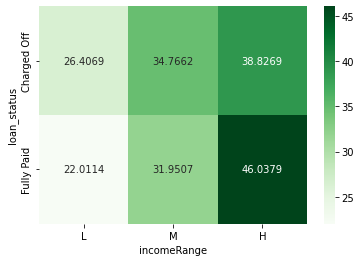

In [50]:
sns.heatmap(resPlt ,cmap="Greens",annot=True,fmt='g')

# Inference from the data above : The percentage of the loan amount Charged Off is in the increasing from the Lower income to the Higher income group. 

In [51]:
#loan_status for different purpose over median loan amount
resp=pd.pivot_table(data=df1,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

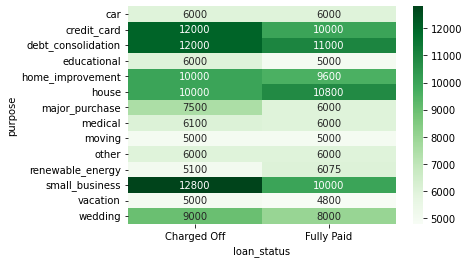

In [52]:
sns.heatmap(resp,cmap="Greens",annot=True,fmt='g')

### Inference from the analysis above : The loan_amount taken for creditcard,debt_consolidation,small_business are among the top Charged Off

# Analysis of Purpose against loan status

In [53]:
dfannualdefault=df1[['purpose','incomeRange','loan_status','loan_amnt']]
dfannualdefault=dfannualdefault[dfannualdefault['loan_status']=='Charged Off']
dfannualdefault.head()


,purpose,incomeRange,loan_status,loan_amnt
1,car,L,Charged Off,2500
8,small_business,L,Charged Off,5600
9,other,L,Charged Off,5375
12,debt_consolidation,L,Charged Off,9000
14,other,H,Charged Off,10000


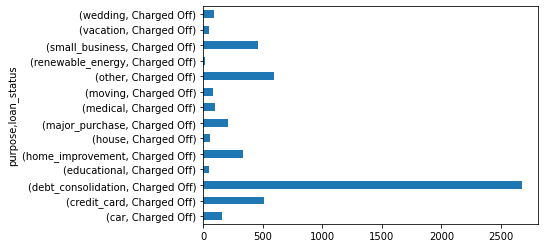

In [54]:
dfannualdefault.groupby(['purpose'])['loan_status'].value_counts().plot.barh()
#The largest number of loan is taken for debt_consolidation
plt.show()

### Inference from the above analysis : The number of defaulters are more for debt_consolidation loan applications followed by other ,small business ,credit card. 

# Analysis of Loan amount against purpose and loan status

In [55]:
resp_la =pd.pivot_table(data=dfannualdefault,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.50))

<AxesSubplot:xlabel='purpose'>

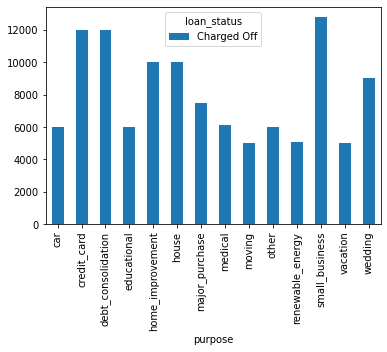

In [56]:
#sns.heatmap(resp_la,cmap="Greens",annot=True,fmt='g')
resp_la.plot(kind="bar")

### Inference from above analysis : The median loan amount charged off is higher for loans taken against small_business,debt_consolidation,credit card.

# Analysis of Percentage of Purpose against Annual income range and loan status

In [57]:
dfannualdefaultLst=df1[['purpose','incomeRange','loan_status']]
dfannualdefaultLst=dfannualdefaultLst[dfannualdefaultLst['loan_status']=='Charged Off']
dfannualdefaultLst.head()
resannualLst=pd.pivot_table(data=dfannualdefaultLst,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len,margins=True,fill_value =0)
resannualLst.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Charged Off,73,46,36,155
credit_card,Charged Off,186,162,162,510
debt_consolidation,Charged Off,1016,952,710,2678
educational,Charged Off,32,10,10,52
home_improvement,Charged Off,92,110,128,330


In [58]:
resannualLst.tail()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
renewable_energy,Charged Off,10,2,6,18
small_business,Charged Off,138,177,147,462
vacation,Charged Off,25,17,8,50
wedding,Charged Off,33,33,26,92
All,,2107,1811,1480,5398


In [59]:
resannualLst.value_counts()

L     M     H     All 
10    2     6     18      1
22    15    22    59      1
25    17    8     50      1
32    10    10    52      1
33    33    26    92      1
39    33    29    101     1
49    21    14    84      1
73    46    36    155     1
92    110   128   330     1
112   61    38    211     1
138   177   147   462     1
186   162   162   510     1
280   172   144   596     1
1016  952   710   2678    1
2107  1811  1480  5398    1
dtype: int64

In [60]:
resannualPer = (resannualLst.div(resannualLst.iloc[:,-1],axis=0)*100)

In [61]:
resannualPer.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Charged Off,47.096774,29.677419,23.225806,100.0
credit_card,Charged Off,36.470588,31.764706,31.764706,100.0
debt_consolidation,Charged Off,37.938760,35.548917,26.512323,100.0
educational,Charged Off,61.538462,19.230769,19.230769,100.0
home_improvement,Charged Off,27.878788,33.333333,38.787879,100.0


In [62]:
##Apply customisations
resannualPerPlt = resannualPer.drop(index='All',axis=0)
resannualPerPlt1 = resannualPerPlt.drop(resannualPerPlt.columns[-1],axis=1)

<AxesSubplot:ylabel='purpose,loan_status'>

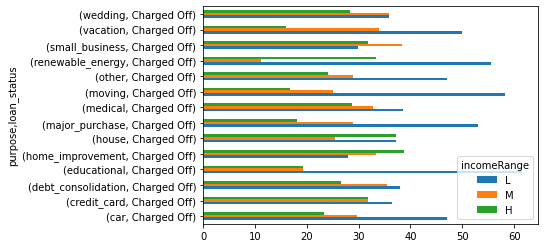

In [63]:
resannualPerPlt1.plot(kind="barh")

### Inference from the data above : On percentage analysis,Low income group creates more charge_offs when they apply for educational,moving,renewable energy loans.

In [64]:
dfannualpaid=df1[['purpose','incomeRange','loan_status']]
dfannualpaid=dfannualpaid[dfannualpaid['loan_status']=='Fully Paid']
dfannualpaid.head()
resannualpaid=pd.pivot_table(data=dfannualpaid,index=["purpose","loan_status"],columns ="incomeRange",margins=True,aggfunc=len,fill_value=0)
resannualpaid.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Fully Paid,464,436,393,1293
credit_card,Fully Paid,1265,1488,1635,4388
debt_consolidation,Fully Paid,4874,5122,4992,14988
educational,Fully Paid,143,62,60,265
home_improvement,Fully Paid,505,693,1254,2452


In [65]:
resannualpaid = (resannualpaid.div(resannualpaid.iloc[:,-1],axis=0)*100)
resannualpaid.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Fully Paid,35.885538,33.720031,30.394432,100.0
credit_card,Fully Paid,28.828624,33.910665,37.260711,100.0
debt_consolidation,Fully Paid,32.519349,34.174006,33.306645,100.0
educational,Fully Paid,53.962264,23.396226,22.641509,100.0
home_improvement,Fully Paid,20.595432,28.262643,51.141925,100.0


In [66]:
resannualpaidPlt = resannualpaid.drop(index='All',axis=0)
resannualpaiPlt1 = resannualpaidPlt.drop(resannualpaidPlt.columns[-1],axis=1)

<AxesSubplot:ylabel='purpose,loan_status'>

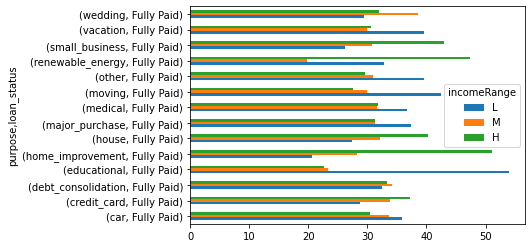

In [67]:
resannualpaiPlt1.plot(kind="barh")

### Inference from the data above : On percentage analysis,Low income group is highest in paying off educational loans but they are also highest in charge off's in the same category.

# Analysis Grade against Loan status

In [68]:
dfrisk = df1[['grade','loan_status']]
resrisk = pd.pivot_table(data=dfrisk,index="grade",columns="loan_status",aggfunc=len,margins=True,fill_value=0)
resrisk = (resrisk.div(resrisk.iloc[:,-1],axis=0)*100)
resrisk.head()



loan_status,Charged Off,Fully Paid,All
grade,,,
A,5.781185,94.218815,100.0
B,11.933069,88.066931,100.0
C,16.797181,83.202819,100.0
D,21.795902,78.204098,100.0
E,26.717557,73.282443,100.0


In [69]:

resriskPlt = resrisk.drop(index='All',axis=0)
resriskPlt1 = resriskPlt.drop(resriskPlt.columns[-1],axis=1)

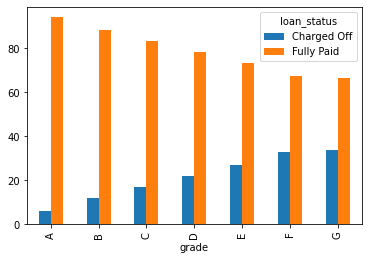

In [70]:
resriskPlt1.plot(kind="bar")
plt.show()

### Inference from the analysis above : The percentage of chargeoff increases with risk represented by higher Grades

In [71]:
dfriskSub = df1[['sub_grade','loan_status']]
resriskSub = pd.pivot_table(data=dfriskSub,index="sub_grade",columns="loan_status",margins=True,aggfunc=len,fill_value=0)
resriskSub  = (resriskSub.div(resriskSub.iloc[:,-1],axis=0)*100)

resriskSub.head()

resriskSubPlt = resriskSub.drop(index='All',axis=0)
resriskSubPlt1 = resriskSubPlt.drop(resriskSubPlt.columns[-1],axis=1)

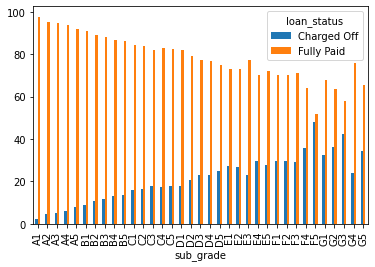

In [72]:
resriskSubPlt1.plot(kind="bar")
plt.show()

### Inference from the analysis above : The percentage of chargeoff increases with risk represented by higher Sub Grades

<AxesSubplot:xlabel='grade', ylabel='purpose'>

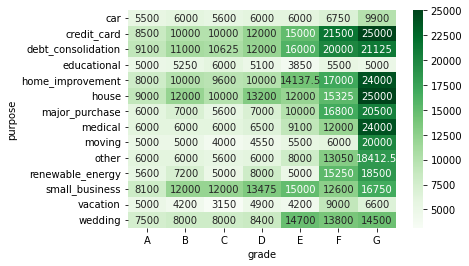

In [73]:
resg=pd.pivot_table(data=df1,index="purpose",columns ="grade",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
sns.heatmap(resg,cmap="Greens",annot=True,fmt='g')

### Inference from the analysis above : High risk group needs loan more for credit_Card,medical,home_improvement purposes

# Analysis of years in employment against term and loan status



In [74]:
df1.term.value_counts()

 36 months    28272
 60 months     9252
Name: term, dtype: int64

In [75]:
df1.term.isnull().sum()

0

In [76]:
dfempl=df1[['emp_length','term','loan_status']]
resempl=pd.pivot_table(data=dfempl,index=['emp_length','loan_status'],columns =['term'],aggfunc=len,fill_value=0)


In [77]:
resempl.head()

term                     36 months   60 months
emp_length loan_status                        
1 year     Charged Off         302         154
           Fully Paid         2280         431
10+ years  Charged Off         630         701
           Fully Paid         5202        1946
2 years    Charged Off         356         210

<AxesSubplot:xlabel='emp_length,loan_status'>

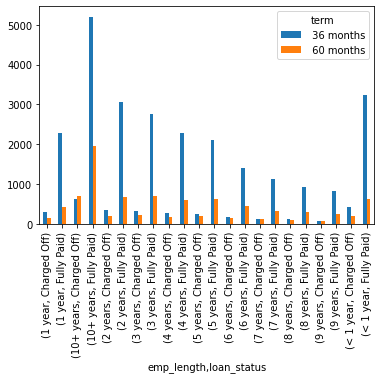

In [78]:
resempl.plot(kind="bar")

# Inference from analysis above : short term loans are mostly requested among all employee groups - TBD

In [79]:
dfemplgrade=df1[['grade','term']]
resemplg=pd.pivot_table(data=dfemplgrade,index=['grade'],columns =['term'],aggfunc=len)
resemplg.head()

term,36 months,60 months
grade,,
A,9273,379
B,9083,2272
C,5626,2036
D,3170,1808
E,857,1763


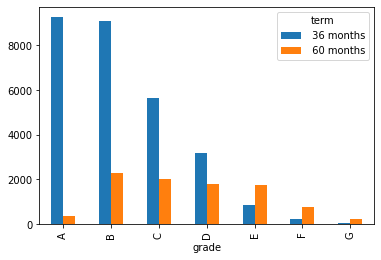

In [80]:
resemplg.plot(kind="bar")
plt.show()

# Inference from analysis above : while the credit score deteriorates, people tend to go for long term loans.

In [81]:
dfemplstat=df1[['emp_length','loan_status']]
resemplstat=pd.pivot_table(data=dfemplstat,index=['emp_length'],columns =['loan_status'],margins =True,aggfunc=len,fill_value=0)


In [82]:
resemplstat.head()

loan_status,Charged Off,Fully Paid,All
emp_length,,,
1 year,456,2711,3167
10+ years,1331,7148,8479
2 years,566,3724,4290
3 years,555,3456,4011
4 years,462,2880,3342


##### From total number of charged off cases, it appears that 10+ years are among the most charged off cases.
##### As they are top among the fully paid as well, It would be more meaningful if we analyze the Percentage. Please see the analysis continued below.

In [83]:
resemplstat = (resemplstat.div(resemplstat.iloc[:,-1],axis=0)*100)
resemplstat.head()

loan_status,Charged Off,Fully Paid,All
emp_length,,,
1 year,14.398484,85.601516,100.0
10+ years,15.697606,84.302394,100.0
2 years,13.193473,86.806527,100.0
3 years,13.836948,86.163052,100.0
4 years,13.824057,86.175943,100.0


In [84]:
resemplstatPlt = resemplstat.drop(index='All',axis=0)
resemplstatPlt1 = resemplstatPlt.drop(resemplstatPlt.columns[-1],axis=1)

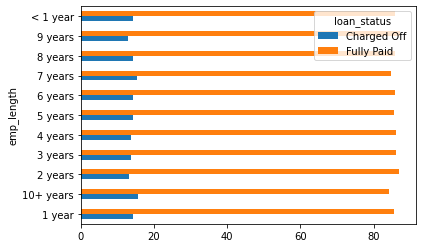

In [85]:
resemplstatPlt1.plot(kind="barh")
plt.show()

### The percentage of charged off cases are within +/-2% among all employement years.

# Analysis dti against loan status

In [86]:
df1.dti.value_counts()

0.00     167
18.00     44
12.00     44
19.20     39
13.20     38
        ... 
29.78      1
25.73      1
29.48      1
25.60      1
25.43      1
Name: dti, Length: 2848, dtype: int64

In [87]:
df1.dti.isnull().sum()

0

In [88]:
df1['dtiRange']=pd.qcut(df1.dti,[0,0.33,0.66,1],["L","M","H"])
df1[['dti','dtiRange']]

,dti,dtiRange
0,27.65,H
1,1.00,L
2,8.72,L
3,20.00,H
5,11.20,M
...,...,...
39712,11.33,M
39713,6.40,L
39714,2.30,L
39715,3.72,L


In [89]:
dfdtRange=df1[['loan_status','dtiRange']]
dfdtRange.head()

,loan_status,dtiRange
0,Fully Paid,H
1,Charged Off,L
2,Fully Paid,L
3,Fully Paid,H
5,Fully Paid,M


In [90]:
resdti=pd.pivot_table(data=dfdtRange,index=['dtiRange'],columns =['loan_status'],aggfunc=len)
resdti.head()

loan_status,Charged Off,Fully Paid
dtiRange,,
L,1553,10833
M,1779,10607
H,2066,10686


<AxesSubplot:xlabel='dtiRange'>

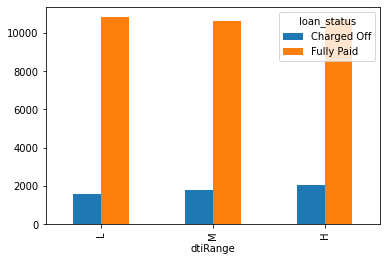

In [91]:
resdti.plot(kind="bar")

<AxesSubplot:xlabel='dtiRange'>

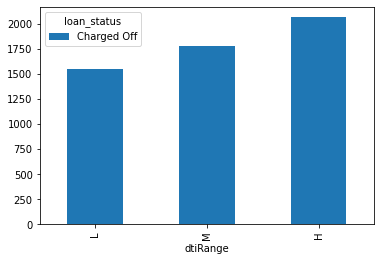

In [92]:
resdtplt = resdti[['Charged Off']]
resdtplt.plot(kind='bar')

# Inference from the analysis above : higher the Dti then higher the charged Off

# Analysis of Interest rate against Loan status

In [93]:
df1.int_rate.value_counts()

10.99    891
11.49    766
7.51     755
13.49    736
7.88     699
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [94]:
df1['intRange']=pd.qcut(df1.int_rate,[0,0.33,0.66,1],["L","M","H"])

In [95]:
dfint = df1[['loan_status','intRange']]

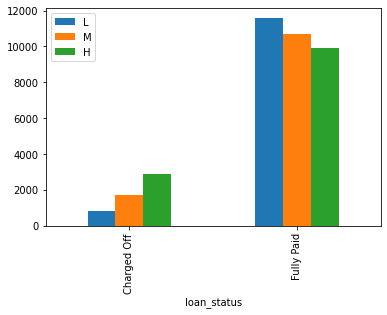

In [96]:
dfint.groupby('loan_status')['intRange'].value_counts().unstack().plot(kind='bar')
plt.show()

# Inference from the analysis above : High interest rates get more charged Off while Low interest rates gets fully Paid

# Analysis of why Low income group tops in Charge Off and Fully paid category of Educational Loans

In [97]:
dfLowIncome=df1[['incomeRange','loan_status','term','int_rate','grade','purpose']]
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose
0,L,Fully Paid,36 months,10.65,B,credit_card
1,L,Charged Off,60 months,15.27,C,car
2,L,Fully Paid,36 months,15.96,C,small_business
3,M,Fully Paid,36 months,13.49,C,other
5,L,Fully Paid,36 months,7.90,A,wedding


In [98]:
dfLowIncome=dfLowIncome[dfLowIncome.incomeRange =='L']
dfLowIncome=dfLowIncome[dfLowIncome.purpose =='educational']


In [99]:
dfLowIncome['intRange']=pd.qcut(dfLowIncome.int_rate,[0,0.33,0.66,1],["L","M","H"])

In [100]:
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose,intRange
25162,L,Fully Paid,60 months,18.67,F,educational,H
25328,L,Charged Off,36 months,13.23,C,educational,H
25415,L,Charged Off,36 months,13.23,C,educational,H
25591,L,Fully Paid,36 months,10.75,B,educational,M
26251,L,Fully Paid,36 months,7.51,A,educational,L


In [101]:
dfLowIncome=dfLowIncome[['loan_status','term','intRange']]

In [102]:
resLincome=pd.pivot_table(data=dfLowIncome,index=["loan_status","term"],columns =["intRange"],margins=True,aggfunc=len,fill_value=0)
resLincome.head()

intRange                 L   M   H  All
loan_status term                       
Charged Off  36 months   6  11  11   28
             60 months   0   0   4    4
Fully Paid   36 months  53  44  41  138
             60 months   0   1   4    5
All                     59  56  60  175

In [103]:
resLincome = (resLincome.div(resLincome.iloc[:,-1],axis=0)*100)
resLincome.head()
resLincomePlt = resLincome.drop(index='All',axis=0)
resemplstatPlt1 = resLincomePlt.drop(resLincomePlt.columns[-1],axis=1)

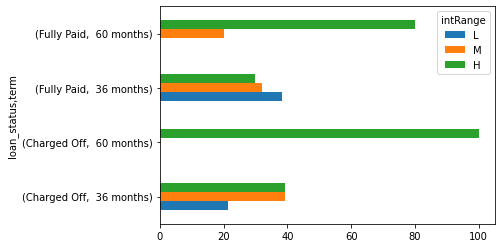

In [104]:
resemplstatPlt1.plot(kind="barh")
plt.show()


# Inference from the analysis above : For educational loans, when the interest rate is high, Low income group will get more charged Off for short term and long term loans. 

# Analysis of Home ownership against Loan status

In [105]:
df1.home_ownership.value_counts()


RENT        18073
MORTGAGE    16581
OWN          2769
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [106]:
df1 = df1[df1.home_ownership != 'NONE']

In [107]:
df1.home_ownership.isnull().sum()

0

In [108]:
dfHmeOwn = df1[['home_ownership','loan_status']]

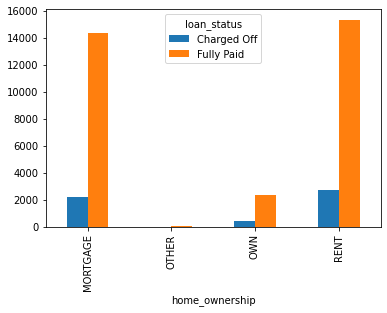

In [109]:
dfHmeOwn.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

# Inference from the analysis above : People who lives in Rented accomodation and those who has mortgage has more charged off than people who has Home ownership. 

# Analysis of Verification status against Loan status

In [110]:
df1.verification_status.value_counts()

Not Verified       16266
Verified           11768
Source Verified     9487
Name: verification_status, dtype: int64

In [111]:
df1.verification_status.isnull().sum()

0

In [112]:
dfVerifySts=df1[['loan_status','verification_status']]

In [113]:
resVerifySts=pd.pivot_table(data=dfVerifySts,index=['verification_status'],columns =['loan_status'],margins =True,aggfunc=len,fill_value=0)


In [114]:
#resVerifySts = (resVerifySts.div(resVerifySts.iloc[:,-1],axis=0)*100)
resVerifyStsPlt = resVerifySts.drop(index='All',axis=0)
resVerifyStsPlt1 = resVerifyStsPlt.drop(resVerifyStsPlt.columns[-1],axis=1)

In [115]:
resVerifyStsPlt1.head()

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2049,14217
Source Verified,1396,8091
Verified,1953,9815


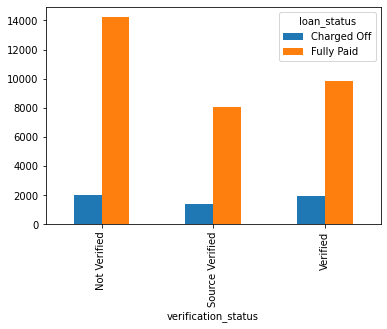

In [116]:
resVerifyStsPlt1.plot(kind="bar")
plt.show()

# Inference from the analysis above : The charged off cases of people with 'Not Verified' verification status is slightly high compared to others.